#About Data:
The Iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters
Due to the size and the feature of the dataset, it is very prone to overfitting ad we have to fix this issue unless our model will overfit.

In [ ]:
#First I load the libraries that we need:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
#We load the dataset and then split it into train and test parts
from sklearn.datasets import load_iris
df= load_iris()
data= df['data']
targets= df['target']
train_data, test_data, train_targets, test_targets = train_test_split (data, targets, test_size=0.1)

In [ ]:
train_data.shape

(135, 4)

In [ ]:
# Convert targets to a one-hot encoding
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [ ]:
#In this cell I use different regularization methods such as dropout layer and weight regularization to avoid overfitting
dropout_rate, weight_decay=0.3, 0.001
model= Sequential([
    Dense(64, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay), kernel_initializer= tf.keras.initializers.he_uniform(), bias_initializer='ones' ,input_shape= (4,)),
    Dense(128, activation= 'relu',kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
    Dense(128, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(128, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        BatchNormalization(),
        Dense(64, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(64, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(weight_decay)),
        Dense(3, activation='softmax')])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#I am also using early_stopping and also to learning scheduler to optimize my model further
early_stopping, learning_rate_reduction=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, mode='max'), tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)]

history= model.fit(train_data, train_targets, epochs=100, batch_size=40, validation_split=0.05, callbacks=[early_stopping, learning_rate_reduction],verbose=False)

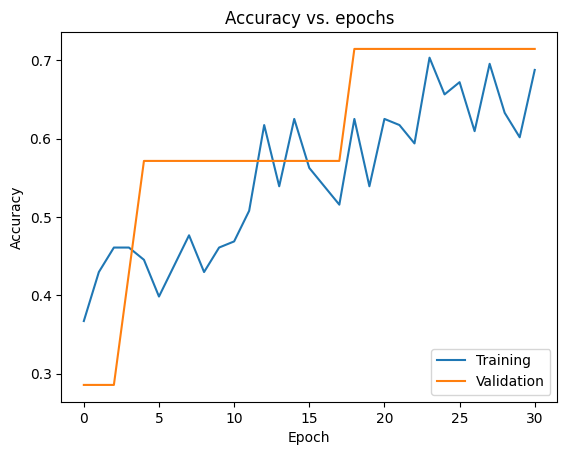

In [ ]:
#With vizualization we can get abetter look into our model perfomance and whether we have overfitted or not
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()